In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.naive_bayes import GaussianNB
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
dataset = 'C:/Users/Ryan Gunawan/Downloads/data.csv'
df = pd.read_csv(dataset, sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [29]:
df.duplicated().any()

False

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [31]:
df.isna().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [32]:
df = df.drop(['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification (grade)', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date' ], axis=1)
df = df.rename(columns={"Nacionality": "Nationality"})
df

,Marital status,Previous qualification,Nationality,Admission grade,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,127.3,1,0,20,0,0,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,1,142.5,1,0,19,0,0,6,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,1,124.8,1,0,19,0,0,6,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,1,1,119.6,0,0,20,0,0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,1,1,141.5,0,0,45,0,0,6,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,1,122.2,1,0,19,0,0,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,105,119.0,0,0,18,1,0,6,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,149.5,0,1,30,0,0,7,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,153.8,0,1,20,0,0,5,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [33]:
df['Target'] = LabelEncoder().fit_transform(df['Target'])

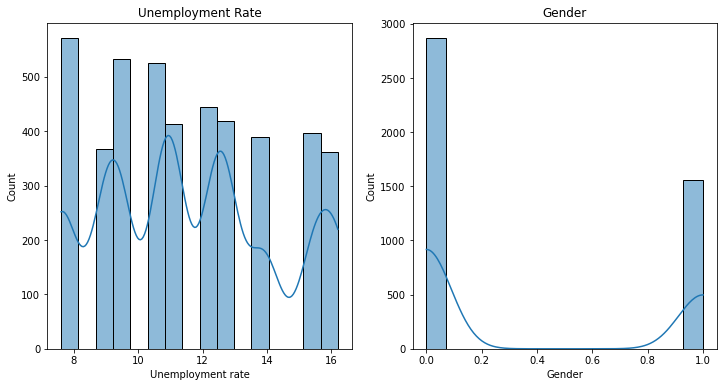

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Unemployment rate'], kde=True)
plt.title('Unemployment Rate')

plt.subplot(1, 2, 2)
sns.histplot(df['Gender'], kde=True)
plt.title('Gender')

plt.show()

In [35]:
dfscaled = StandardScaler().fit_transform(df)

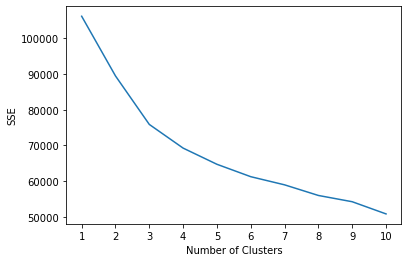

In [36]:
kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42,}

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(dfscaled)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [37]:
from kneed import KneeLocator
findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('best k for your model is ', findknee.elbow)

best k for your model is  4


In [38]:
kmeans = KMeans(n_init=3 , n_clusters=4, max_iter=300, random_state=42)
ykmeans= kmeans.fit_predict(dfscaled)
df['K-Means']= ykmeans

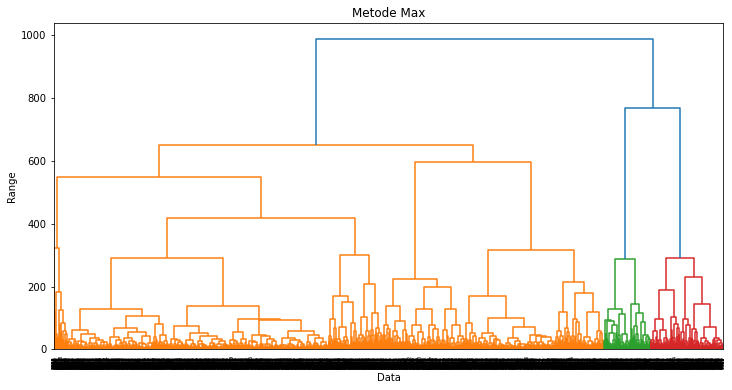

In [39]:
data = df.drop('K-Means', axis=1) 

linkage_matrix = linkage(data, method='ward', metric='euclidean')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, orientation='top', p=30, truncate_mode='level', show_leaf_counts=True)
plt.title('Metode Max')
plt.xlabel('Data')
plt.ylabel('Range')
plt.show()

In [40]:
#Logistic Regression
X = df.drop("Target", axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
Log = LogisticRegression(random_state=0)
Log.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [42]:
ypred = Log.predict(X_test_scaled)
ypred

array([2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0,
       0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0,

In [43]:
Matrix = confusion_matrix(y_test,ypred)
print("Confusion Matrix \n", Matrix)

accuracy = accuracy_score(y_test,ypred)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[120  12  13]
 [ 20  31  26]
 [  9   9 203]]
Accuracy Score:  0.7990970654627539


In [44]:
#KNN
KNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [45]:
ypredKNN = KNN.predict(X_test_scaled)
ypredKNN

array([2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2,
       2, 1, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2,
       1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0,
       0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0,
       2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1,
       0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0,

In [46]:
Matrix = confusion_matrix(y_test,ypredKNN)
print("Confusion Matrix \n", Matrix)

accuracy = accuracy_score(y_test,ypredKNN)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[110  14  21]
 [ 25  31  21]
 [ 15  27 179]]
Accuracy Score:  0.7223476297968398


In [47]:
#Naive Bayes
GNB = GaussianNB()
GNB.fit(X_train_scaled, y_train)

GaussianNB()

In [48]:
y_pred = GNB.predict(X_test_scaled)
print(y_pred)

[2 0 2 2 1 0 0 2 2 2 2 0 2 2 1 2 1 0 2 1 0 2 2 2 2 1 0 0 2 2 1 2 2 2 1 2 2
 2 0 0 2 0 2 2 2 1 1 2 1 2 0 0 1 0 2 1 2 2 0 2 2 1 1 1 1 2 1 2 2 0 0 2 1 2
 1 2 1 0 2 2 2 1 2 2 0 2 0 1 0 2 0 2 1 1 1 0 2 2 2 0 2 2 2 2 2 0 1 0 2 0 2
 2 0 0 2 0 2 2 0 1 1 2 0 0 2 0 2 0 0 2 2 2 0 1 2 2 0 2 0 0 2 1 1 1 2 2 2 0
 0 2 0 0 2 0 2 0 0 1 2 2 2 0 2 1 0 1 2 2 1 0 1 1 1 2 0 2 0 2 1 2 2 0 0 2 2
 2 2 0 0 2 2 2 2 1 1 2 1 2 2 1 1 0 1 2 0 2 2 0 1 1 2 2 0 2 1 1 0 2 1 2 2 2
 2 2 0 2 2 2 1 1 2 2 1 0 2 2 2 1 2 2 0 2 1 1 2 2 2 1 1 2 2 0 2 2 1 0 2 2 2
 2 2 2 0 2 0 2 2 2 0 1 2 2 2 2 0 2 0 0 1 2 0 2 2 2 2 2 1 0 2 2 1 0 1 2 0 2
 1 0 2 0 0 2 0 2 1 0 2 1 0 2 0 0 2 2 2 2 1 0 2 0 1 0 0 1 2 1 1 2 2 0 0 2 0
 2 0 0 0 1 2 0 1 0 2 0 2 0 2 2 0 1 1 2 2 0 2 1 2 2 0 2 2 2 1 1 2 2 2 1 2 2
 2 0 1 0 1 2 0 2 1 0 1 2 1 2 0 2 0 2 2 1 2 0 2 2 2 0 2 0 2 2 2 2 1 1 2 2 2
 2 2 1 2 0 1 2 2 2 2 2 2 1 2 0 2 2 0 0 0 2 1 0 0 2 2 0 2 0 2 2 0 1 2 2 2]


In [49]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Confusion Matrix:
[[ 93  28  24]
 [ 11  41  25]
 [ 16  25 180]]
Accuracy Score: 0.708803611738149


Dari 3 model di atas (Logistic Regression, K-Nearest Neighbor, Naive Bayes) model dengan akurasi tertinggi adalah Logistic Regression dengan nilai akurasi = 0.7990970654627539